NOTE WE ARE DROPPING columns=['Unnamed: 15'] so be mindful when running
code. We are effectively changing the file so it's important to run cells in
order.

## Sonok_Path_For_Data = "/Users/sonokmahapatra/Desktop/AWS_Honeypot_marx-geo.csv"
This is just incase no need to run this code
This is done in VScode but you could upload and refactor code in
Google Colab or Juypter notebooks

In [2]:
# Block of import and dependencies change as needed
# Sonok is using python 3.8.12 but I don't think it should matter too much
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # If this doesn't work in VScode terminal 'python -m pip install seaborn'

In [4]:
# a) First import

# Load the CSV file
df = pd.read_csv('AWS_Honeypot_marx-geo.csv')

# Display the first few rows of the dataframe
df.head()


,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [ ]:
print(df.columns)
r, c = df.shape
print(f'The number of cyber attacks {r} and the number of features we have per attack anaylsis {c}')

num_nans_in_unnamed = df['Unnamed: 15'].isna().sum()
total_values_in_unnamed = len(df['Unnamed: 15'])

print(f'The portion of rows in [Unnamed: 15] column that are NaNs {num_nans_in_unnamed / total_values_in_unnamed}')
# Might be best to drop this column

Index(['datetime', 'host', 'src', 'proto', 'type', 'spt', 'dpt', 'srcstr',
       'cc', 'country', 'locale', 'localeabbr', 'postalcode', 'latitude',
       'longitude', 'Unnamed: 15'],
      dtype='object')
The number of cyber attacks 451581 and the number of features we have per attack anaylsis 16
The portion of rows in [Unnamed: 15] column that are NaNs 0.999816201301649


In [ ]:
# (b) Parse: Convert strings to appropriate data types where needed

# Convert datetime column to pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y %H:%M')

# Convert integer-like columns from float to int
df['spt'] = df['spt'].astype('Int64')
df['dpt'] = df['dpt'].astype('Int64')
df['src'] = df['src'].astype('Int64')

df = df.drop(columns=['Unnamed: 15'])
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,2013-03-03 21:53:00,groucho-oregon,1032051418,TCP,NaN,6000,1433,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333
1,2013-03-03 21:57:00,groucho-oregon,1347834426,UDP,NaN,5270,5060,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000
2,2013-03-03 21:58:00,groucho-oregon,2947856490,TCP,NaN,2489,1080,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250
3,2013-03-03 21:58:00,groucho-us-east,841842716,UDP,NaN,43235,1900,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117
4,2013-03-03 21:58:00,groucho-singapore,3587648279,TCP,NaN,56577,80,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500


/var/folders/nt/5983c1hx7dj3p1sndw5n8jc80000gn/T/ipykernel_7459/197175450.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='counts', y=field, palette='cool', ax=ax)


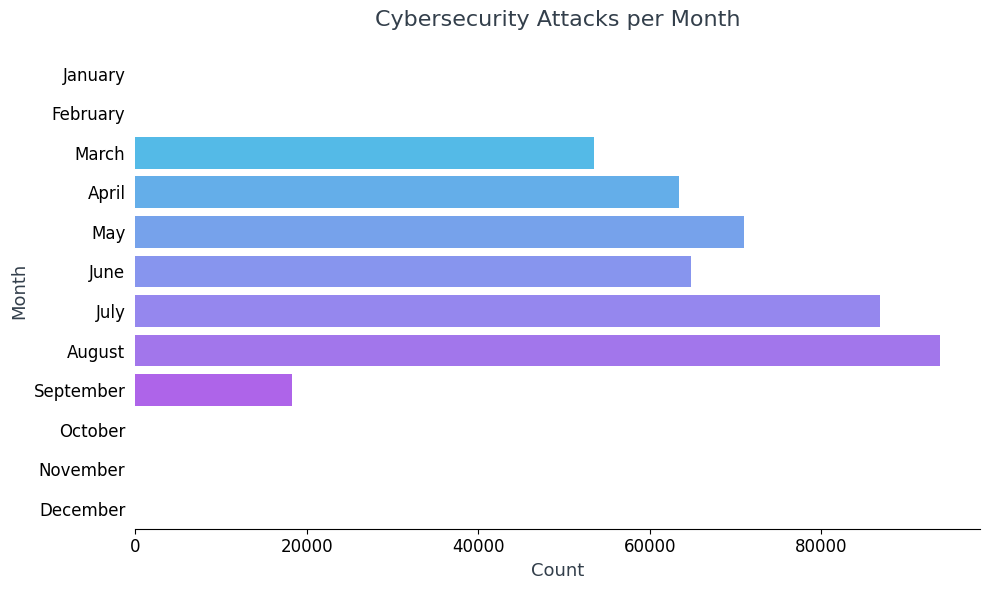

In [ ]:
def bar_plot_data_all_months(df: pd.DataFrame, field: str, subtitle: str, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    # Hide specific spines
    spines_to_hide = ['top', 'right', 'left']
    for spine in spines_to_hide:
        ax.spines[spine].set_visible(False)

    # Filter and prepare data
    filtered_data = df[field].value_counts().reset_index(name='counts').rename(columns={'index': field})

    # Ensure all months are included
    all_months = pd.DataFrame({
        field: range(1, 13),
        'counts': 0
    })
    filtered_data = pd.concat([filtered_data, all_months]).drop_duplicates(field, keep='first').sort_values(field)

    # Map numerical months to month names
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                   7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    filtered_data[field] = filtered_data[field].map(month_names)

    # Create bar plot
    sns.barplot(data=filtered_data, x='counts', y=field, palette='cool', ax=ax)

    # Customize ticks and labels
    ax.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax.set_xlabel('Count', fontsize=13, color='#333F4B')
    ax.set_ylabel('Month', fontsize=13, color='#333F4B')
    ax.set_title(subtitle, fontsize=16, color='#333F4B', pad=20)

    plt.tight_layout()
    plt.show()

# Plot showing cybersecurity attacks per month with all months included
bar_plot_data_all_months(df, 'month', 'Cybersecurity Attacks per Month')






Based on the above model, we can see that the Cyberattacks were condensded inbetween the months of March to September. The highest frequencies occur
during the months of August and July. The amount of cyber attacks peak during those months with some of the highest attacks, ranging above 80,000 attacks each month. There are no outliers in this data and the most relavant columns in this data are the months that have data in them, more specifically the months which have attacks above 20,000 attacks per month. This is the analysis from the first graph of data

<Axes: xlabel='proto'>

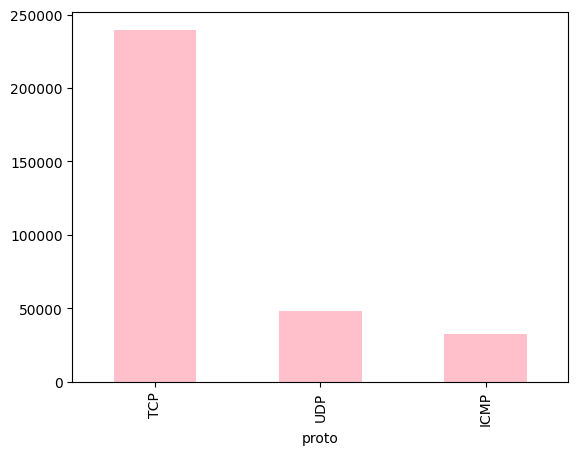

In [10]:
df["proto"].value_counts().plot(kind="bar", color='pink')

Based on the above model, we can see the comparision between the prototypes and the total count. TCP has the highest frequencies and is ordered in decending order. We can't assume there are any outliers since the value of ICMP isn't far off from the UDP. There are only 2 chararistics about this model, the comparision between the prototypes and the total count.


Text(0.5, 1.0, 'Cyberattacks per host')

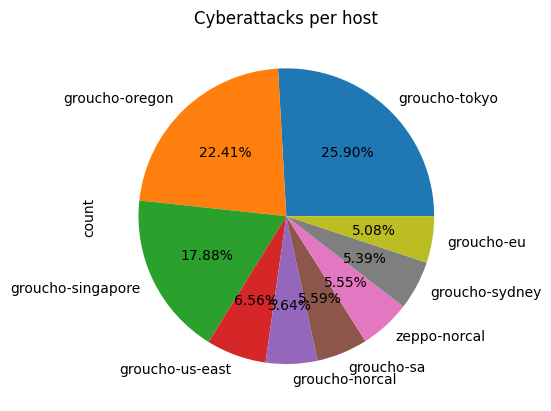

In [11]:
df["host"].value_counts().plot(kind="pie", autopct="%.2f%%").set_title("Cyberattacks per host")

The model above provides a pie chart of all the relating cyberattacks and the  specific cyberattack with their percentage of the pie chart. We can see that there are 9 different variables, in this case there are 9 different variables. groucho-tokyo and grouncho-oregon are the two highest variables taking up 25.90% and 22.41% respectablly. There are no outliers in this data as the pie chart is complete and totals to 100%.
